# Tarea-IPy-regresion-logistica

Esta tarea debe ser realizada en Python.

**Punto 1.--** Construya un gráfico de la función logistica

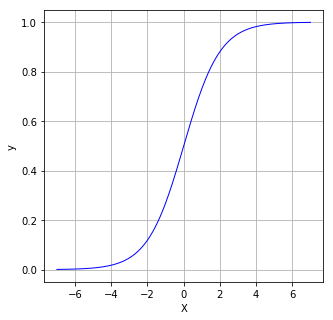

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(5, 5))
plt.clf()

X_test = np.linspace(-7, 7, 300)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test)
plt.plot(X_test, loss, color='blue', linewidth=1)

plt.ylabel('y')
plt.xlabel('X')

plt.grid()
plt.show()

**Punto 2.--** Aplique la regresión logística para construir clasificadores para los datos que hay en el archivo `data.dat`. Imprima los parámetros de cada uno de los clasificadores. Compare los resultados con los obtenidos usando R.

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

data    = pd.read_table('data.dat',    sep = '\t', decimal = '.')
#C1 = data['t'].map(lambda x: 1 if x == 1 else 0)
data['C1']=data['t'] == 1
data['C2']=data['t'] == 2
data['C3']=data['t'] == 3

data=data.reset_index()

mC1 = smf.glm(formula='C1 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC1 = mC1.fit()
print(rC1.params)

mC2 = smf.glm(formula='C2 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC2 = mC2.fit()
print(rC2.params)

mC3 = smf.glm(formula='C3 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC3 = mC3.fit()
print(rC3.params)

Intercept   -27.957943
x1            5.642595
x2            2.319189
dtype: float64
Intercept    35.548913
x1           -0.469803
x2           -9.295725
dtype: float64
Intercept    18.134183
x1           -4.257410
x2            6.137514
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:822: RuntimeWarning: invalid value encountered in true_divide
  (1 - mu) +


**Punto 3.--** Grafique los puntos pertenecientes a cada clase y las fronteras de decisión, que corresponden a la ecuación logística.

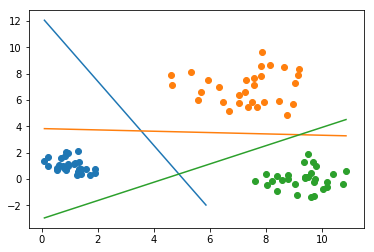

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot
# ==============================
fig, ax = plt.subplots()
dataC1=data[data['t']==1]
ax.scatter(dataC1.x1, dataC1.x2)

dataC2=data[data['t']==2]
ax.scatter(dataC2.x1, dataC2.x2)

dataC3=data[data['t']==3]
ax.scatter(dataC3.x1, dataC3.x2)

x_min=min(data.x1)
x_max=max(data.x1)
y_min=min(data.x2)
y_max=max(data.x2)

# Grupo 1
c = -rC1.params[0] / rC1.params[2]
slope = -rC1.params[1] / rC1.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*((x_max-5)-x_min)
ax.plot([x_min, (x_max-5)], [y_min, y_max])

# Grupo 2
c = -rC2.params[0] / rC2.params[2]
slope = -rC2.params[1] / rC2.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])

# Grupo 3
c = -rC3.params[0] / rC3.params[2]
slope = -rC3.params[1] / rC3.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])

#ax.set_xlim([x_min, x_max])
plt.show()

**Punto 4.--** Aplique la regresión logística al caso 'Enfermedades del corazón'.

In [58]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd


data=pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat',
                   sep = ' ',
                   decimal = '.',
                   thousands = None,
                   header=None
                  )
data.columns = ["AGE", "SEX", "CHESTPAIN", "RESTBP", "CHOL","SUGAR", "ECG", "MAXHR", "ANGINA", "DEP","EXERCISE", "FLUOR","THAL", "OUTPUT"]

data = data.as_matrix()
data = np.matrix(data)

np.random.seed(123)
m_train    = np.random.rand(len(data)) < 0.5
dataEntrenamiento = data[m_train,]
dataPrueba  = data[~m_train,]

claseEntrenamiento = dataEntrenamiento[:,-1]
claseEntrenamiento = claseEntrenamiento.A1 #convierte de matriz a vector 
clasePrueba  = dataPrueba[:,-1]
clasePrueba  = clasePrueba.A1 #convierte de matriz a vector 

modelo_lr = LogisticRegression()
modelo_lr.fit(X=dataEntrenamiento[:,:-1],y=claseEntrenamiento)

predicion = modelo_lr.predict(dataPrueba[:,:-1])

print(metrics.classification_report(y_true=clasePrueba, y_pred=predicion))
print(pd.crosstab(dataPrueba[:,-1].A1, predicion, rownames=['REAL'], colnames=['PREDICCION']))

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

----